About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales
 Competitor Price
 Income
 Advertising
 Population
 Price
 Shelf Location at stores
 Age
 Education
 Urban
 US
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach – 
Step 1: Understand the data by doing the EDA with different visualizations to understand the patterns. Pre process the data like Handling outliers & Null values, applying one hot encoding or label encoding etc.
Step 2: Split the data to train and test.
Step 3: Build a basic model using the Decision tree.
Step 4: Do hyperparameter tuning on the model.
Step 5: Apply Random Forest, Bagging and boosting methods.
Ste6 6: Create a chart which shows the accuracy of all the models you have build
Step 7: Write conclusions.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("../DecisionTree/Company_Data.csv")  # Replace with actual file path
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
# View the first few rows of the dataset
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [5]:
# Check for null values
print(df.isnull().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [6]:
# Summary statistics
print(df.describe())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

In [7]:
# Check data types
print(df.dtypes)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


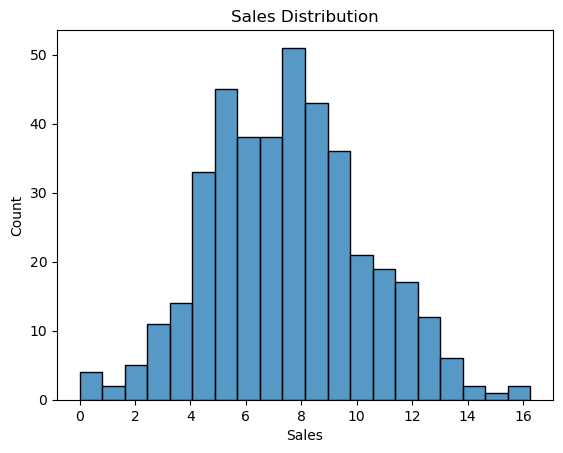

In [8]:
# Sales distribution
sns.histplot(df['Sales'], bins=20)
plt.title("Sales Distribution")
plt.show()

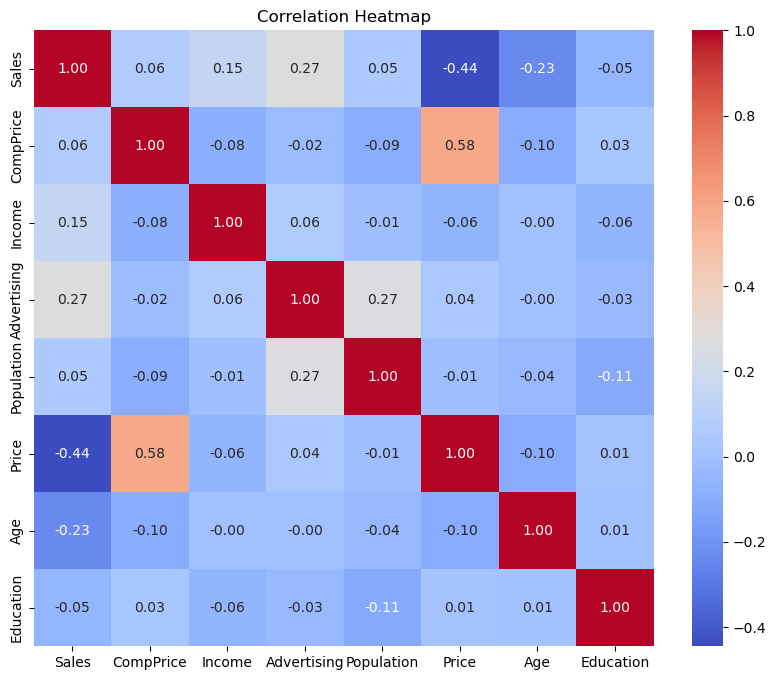

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Urban', 'US', 'ShelveLoc'], drop_first=True)

In [12]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,1,1,0,1
398,5.94,100,79,7,284,95,50,12,1,1,0,0


In [13]:
# Check data types
print(df.dtypes)

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
Urban_Yes             uint8
US_Yes                uint8
ShelveLoc_Good        uint8
ShelveLoc_Medium      uint8
dtype: object


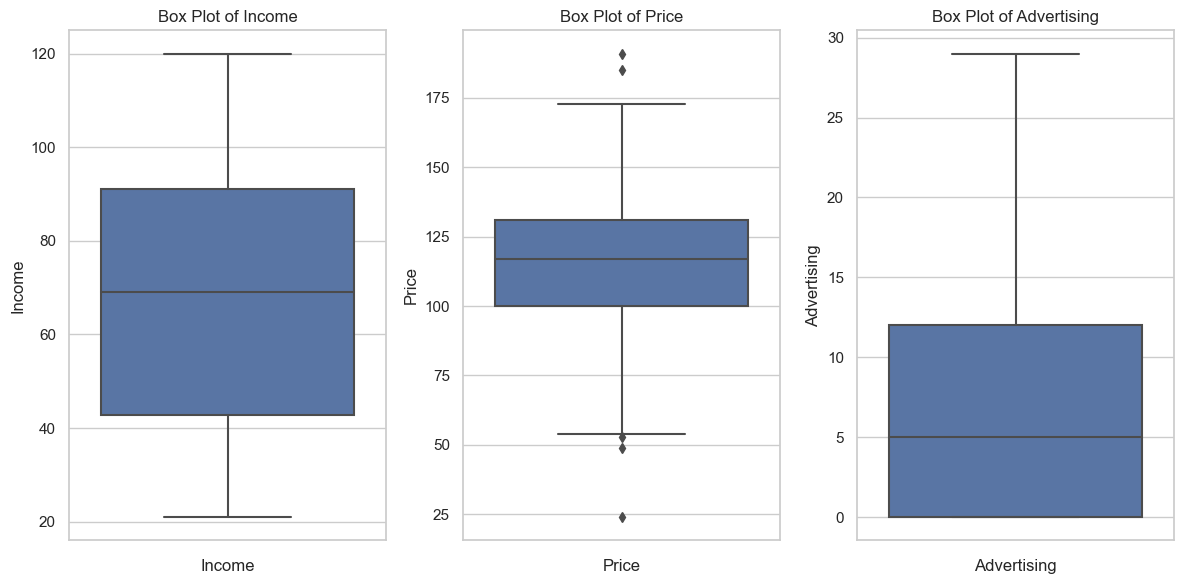

In [14]:
# Select relevant columns for the box plots
columns_to_plot = ['Income', 'Price', 'Advertising']

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with subplots for each variable
plt.figure(figsize=(12, 6))

# Iterate over each column and create a boxplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, current plot index
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [15]:
# Split features and target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)

In [19]:
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
# Predict on train data
y_pred_train = decision_tree_reg.predict(X_train)

In [21]:
y_pred_train

array([ 7.4 , 13.91,  4.1 ,  9.16,  7.22,  8.47,  5.36,  7.41,  3.47,
        5.33,  8.65,  6.18,  7.57, 10.59,  4.94,  7.72,  5.58,  9.64,
        3.89,  8.55,  5.04,  9.  ,  7.58,  8.85,  5.93, 11.85,  8.73,
        6.52,  7.02,  9.32,  6.5 ,  8.67, 11.82,  5.32,  3.07,  8.32,
        9.14,  7.6 ,  8.03, 11.19, 10.21,  8.98, 12.29,  6.88, 10.14,
        7.54, 10.44,  5.74,  6.71, 10.  ,  6.15,  8.77,  3.47, 10.48,
        7.37,  7.23, 11.19,  5.31,  9.7 ,  5.9 ,  8.89, 12.3 ,  6.64,
        7.71,  4.1 ,  6.97,  5.21,  6.62,  0.37, 10.26,  6.63,  5.87,
        6.67, 10.49,  9.01,  7.56,  5.07,  7.52, 15.63,  5.94,  7.9 ,
        7.78,  7.53,  7.3 ,  9.45,  7.95,  6.81,  5.68, 10.51,  5.4 ,
        4.53,  7.99,  8.19,  9.48,  0.53,  4.69,  7.45,  7.36, 13.39,
        5.87,  4.95,  9.09,  6.88,  4.74,  9.01,  3.62,  2.66, 10.62,
        6.41,  4.19,  9.34,  3.9 ,  9.08,  8.7 ,  5.17,  7.5 ,  8.61,
        5.3 ,  7.63,  5.28,  5.32,  2.05,  5.36,  9.39,  7.74,  4.47,
        6.59, 11.96,

In [22]:
# Predict on test data
y_pred_dt = decision_tree_reg.predict(X_test)

In [23]:
y_pred_dt

array([ 8.01,  4.1 , 10.62,  5.17,  7.44,  5.16, 10.96,  8.01, 11.93,
       11.54,  6.54,  9.95,  9.33,  7.54,  9.16,  8.41,  3.58, 12.29,
        6.81,  3.98,  9.64,  0.16,  7.96,  7.53,  5.17,  8.55,  5.33,
        9.14,  4.78,  6.67, 12.29, 11.28,  4.95,  4.17, 11.28,  0.16,
        5.31,  8.67,  8.43,  3.9 ,  2.34,  8.54,  9.64, 10.  ,  7.02,
        4.95,  7.38,  8.85,  4.1 ,  6.93, 11.07,  9.32, 10.01, 10.77,
        9.01,  5.04,  6.56,  8.21, 11.99,  9.09,  6.67, 11.28,  3.47,
        5.53,  8.31,  6.71, 12.29, 10.21,  4.53, 10.  ,  5.53,  5.53,
       12.49,  2.66,  3.47,  3.47,  8.47,  8.44,  6.67,  6.97])

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 6.41729625
Root Mean Squared Error (RMSE): 2.533238293173384
Mean Absolute Error (MAE): 2.053125
R² Score: 0.3515395162808971


In [28]:
from sklearn.model_selection import GridSearchCV
# Set up the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

# Perform grid search with 3-fold cross-validation
grid_search = GridSearchCV(decision_tree_reg, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
print("Best Parameters for Decision Tree Regressor:", best_params)
print("Best Cross-Validation MSE:", best_mse)

# Train the model with the best parameters
best_tree_regressor = grid_search.best_estimator_
best_tree_regressor.fit(X_train, y_train)

# Make predictions
y_pred = best_tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Best Parameters for Decision Tree Regressor: {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation MSE: 4.717068817962734
Mean Squared Error (MSE): 4.9379559375
Root Mean Squared Error (RMSE): 2.2221511959135456
Mean Absolute Error (MAE): 1.7965625000000003
R² Score: 0.5010251714941684


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R² Score:", r2_rf)


Random Forest Results:
MSE: 3.080277622685014
RMSE: 1.7550719707992075
MAE: 1.4391329268002857
R² Score: 0.688741451324543


In [30]:
from sklearn.ensemble import BaggingRegressor

# Initialize the Bagging Regressor with Decision Tree as the base estimator
bagging_regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Make predictions
y_pred_bag = bagging_regressor.predict(X_test)

# Evaluate the model
mse_bag = mean_squared_error(y_test, y_pred_bag)
rmse_bag = np.sqrt(mse_bag)
mae_bag = mean_absolute_error(y_test, y_pred_bag)
r2_bag = r2_score(y_test, y_pred_bag)

print("Bagging Regressor Results:")
print("MSE:", mse_bag)
print("RMSE:", rmse_bag)
print("MAE:", mae_bag)
print("R² Score:", r2_bag)


Bagging Regressor Results:
MSE: 3.080761704999999
RMSE: 1.7552098749152476
MAE: 1.4359199999999999
R² Score: 0.6886925353574587


In [31]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=50, random_state=42)

# Train the model
adaboost_regressor.fit(X_train, y_train)

# Make predictions
y_pred_ada = adaboost_regressor.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print("AdaBoost Regressor Results:")
print("MSE:", mse_ada)
print("RMSE:", rmse_ada)
print("MAE:", mae_ada)
print("R² Score:", r2_ada)


AdaBoost Regressor Results:
MSE: 3.056823640598638
RMSE: 1.7483774308193978
MAE: 1.4583360530903533
R² Score: 0.6911114495257122


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Results:")
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)
print("R² Score:", r2_gb)


Gradient Boosting Regressor Results:
MSE: 2.0381685369452613
RMSE: 1.427644401433796
MAE: 1.1883492458594431
R² Score: 0.7940453886060534


Model Performance (R² Score):
Decision Tree: R² Score = 0.5010
Random Forest: R² Score = 0.6887
Bagging: R² Score = 0.6887
AdaBoost: R² Score = 0.6911
Gradient Boosting: R² Score = 0.7940


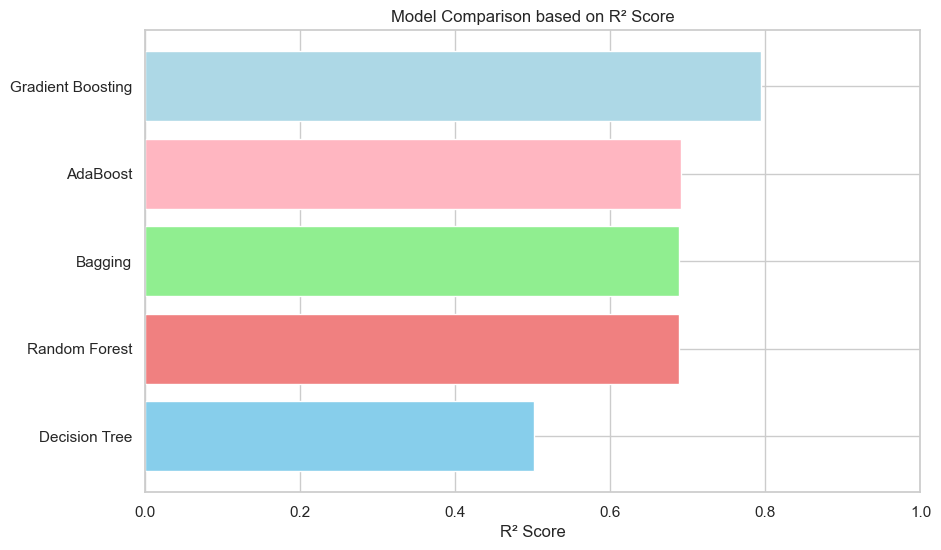

In [35]:
import matplotlib.pyplot as plt

# Model names and their respective R² scores
model_names = ['Decision Tree', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting']
r2_scores = [r2, r2_rf, r2_bag, r2_ada, r2_gb]

# Print R² scores for all models
print("Model Performance (R² Score):")
for model, score in zip(model_names, r2_scores):
    print(f"{model}: R² Score = {score:.4f}")

# Plotting the R² scores for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightblue'])
plt.xlabel('R² Score')
plt.title('Model Comparison based on R² Score')
plt.xlim(0, 1)  # R² Score ranges from 0 to 1 for better visualization
plt.show()


From the R² scores for each model, we can draw some conclusions:

Gradient Boosting:

R² Score: 0.7940
Conclusion: Gradient Boosting has the highest R² score among all models, indicating it best captures the variability in the data. This model’s superior performance suggests it successfully captures complex relationships within the data, making it a strong choice for accurate predictions.
Consideration: Gradient Boosting tends to be computationally more expensive and may require careful tuning to avoid overfitting. However, its high R² score makes it the most accurate model for this dataset.
AdaBoost:

R² Score: 0.6911
Conclusion: AdaBoost performs well, with a slightly lower R² score than Gradient Boosting. It’s effective at capturing patterns in the data, especially in cases with some misclassified instances that it can adjust for in each subsequent model.
Use Case: AdaBoost can be a good alternative if you want a boosting model that’s less complex than Gradient Boosting but still achieves relatively high accuracy.
Random Forest and Bagging:

R² Score: 0.6887 (for both)
Conclusion: Random Forest and Bagging both provide strong performance, indicating that they are effective at reducing overfitting by averaging multiple decision trees. Their identical scores suggest similar performance, as both rely on ensemble averaging methods.
Strength: These models offer a good balance of accuracy and interpretability, making them ideal choices if interpretability and computational efficiency are priorities.
Decision Tree:

R² Score: 0.5010
Conclusion: The Decision Tree model has the lowest R² score, indicating it may be overfitting or not capturing enough complexity in the data. Single decision trees tend to be more prone to overfitting than ensemble methods.
Recommendation: Although it performs the least effectively, Decision Tree could still be useful as a baseline model or in cases where interpretability is the primary concern.

Final Recommendation
Best Model: Gradient Boosting is the best choice here due to its high R² score, suggesting it can handle complex patterns well.
Alternatives: If you need slightly simpler models with high accuracy, Random Forest and Bagging are good choices. They offer robust performance with less computational expense than boosting methods.
Interpretability: For interpretability-focused applications, Random Forest is an ideal compromise between accuracy and explainability. If simplicity is key, a Decision Tree can be used, though it’s less accurate.